# Title Heart Disease Prediction

Author: [Muhammad Abdullah](https://www.kaggle.com/abdullahlmao)\
Date: 29-08-2024\
Dataset: [Heart Disease uci](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)


## Meta Data about Dataset
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
- **id** (Unique id for each patient)
- **age** (Age of the patient in years)
- **origin** (place of study)
- **sex** (Male/Female)
- **cp chest pain type** 
      1. typical angina,
      2. atypical angina, 
      3. non-anginal,
      4. asymptomatic
- **trestbps resting blood pressure** (resting blood pressure (in mm Hg on admission to the hospital))
- **chol** (serum cholesterol in mg/dl)
- **fbs** (if fasting blood sugar > 120 mg/dl)
- **restecg** (resting electrocardiographic results)
- **Values:** [normal, stt abnormality, lv hypertrophy]
- **thalach:** maximum heart rate achieved
- **exang:** exercise-induced angina (True/ False)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** the slope of the peak exercise ST segment
- **ca:** number of major vessels (0-3) colored by fluoroscopy
- **thal:** [normal; fixed defect; reversible defect]
- **num:** the predicted attribute
### Acknowledgements
#### Creators:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
- Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.



## Aims and Objective:

We will fill this after doing some EDA. 

### Import Libraries

Let's Start the project by importing all the libraries we will need in this project. 

In [12]:
# Import libraries

# 1. To Handle Data
import pandas as pd
import numpy as np  

# 2. To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. To Preprocess the data
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# Import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [13]:
#Load the data from csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv') 
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore Each Column

In [14]:
# Exploring the dayatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [15]:
# data shape
df.shape

(920, 16)

In [16]:
# id column
df['id'].min(),df['id'].max()

(1, 920)

In [17]:
# Age column
df['age'].min(),df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

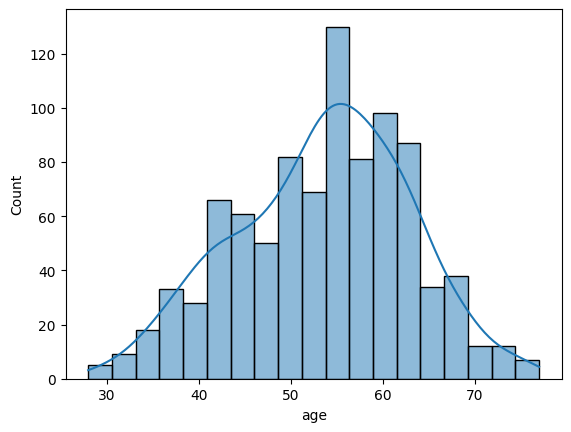

In [18]:
# Draw a histogram to see distribution of age column
sns.histplot(df['age'], kde= True)

Mean:  53.51086956521739
Median:  54.0
Mode:  54


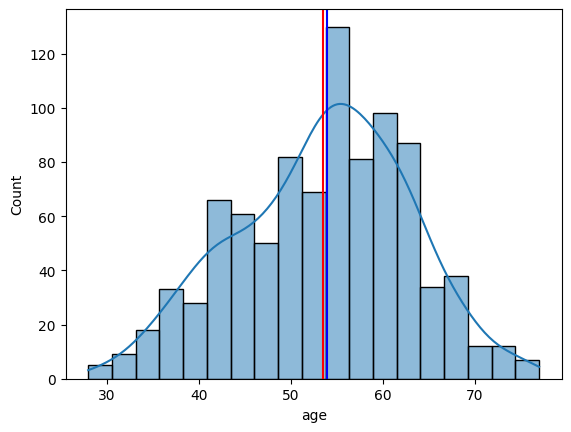

In [19]:
#plot mean, median, mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color= 'red')
plt.axvline(df['age'].median(), color= 'yellow')
plt.axvline(df['age'].mode()[0], color= 'blue')

# Print mean, median, mode
print("Mean: ", df['age'].mean())
print("Median: ", df['age'].median())
print("Mode: ", df['age'].mode()[0])

Let's explore the gender based distribution for age column.

In [20]:
# Plot the histogram of age column using plotly and coloring this by sex.
fig = px.histogram(data_frame=df, x="age", color="sex", title="Age Distribution by Sex")
fig.show()

In [21]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [22]:
# Calculate the percentages of male and female counts in data
df['sex'].value_counts(normalize=True)

sex
Male      0.78913
Female    0.21087
Name: proportion, dtype: float64

In [23]:
# Find the value count of age column grouping be sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [24]:
# Lets deal with dataset column. 
# find the unique values.
df['dataset'].unique()


array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [25]:
# Find unique value counts in dataset
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [26]:
# plot the countplot of dataset column
fig = px.bar(df, x = 'dataset', color='sex')
fig.show()

# Print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [27]:
# Make a plot of age column using plotlt and coloring this by dataset column.
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# Print the mean, median, mode of age column grouped by dataset column
print("Mean of dataset: ",df.groupby('dataset')['age'].mean())
print("--------------------------")
print("Median of dataset: ",df.groupby('dataset')['age'].median())
print("--------------------------")
print("Mode of dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))
print("--------------------------")

Mean of dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
--------------------------
Median of dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
--------------------------
Mode of dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
--------------------------


### Let's explore cp(Chest Pain) column:

In [28]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [29]:
# Draw the plot of age column grouped by cp column using plotly
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

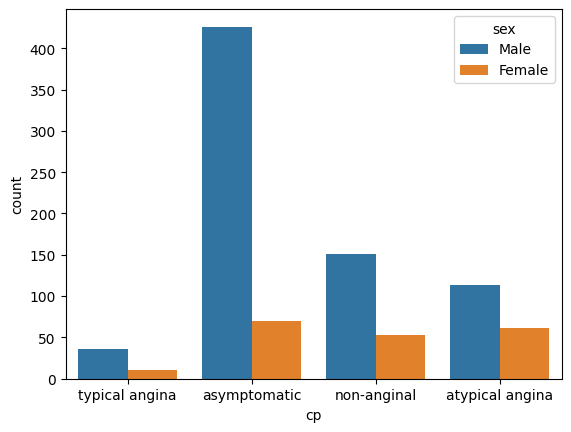

In [30]:
# countplot of cp column by sex column
sns.countplot(df, x='cp', hue='sex')


<Axes: xlabel='cp', ylabel='count'>

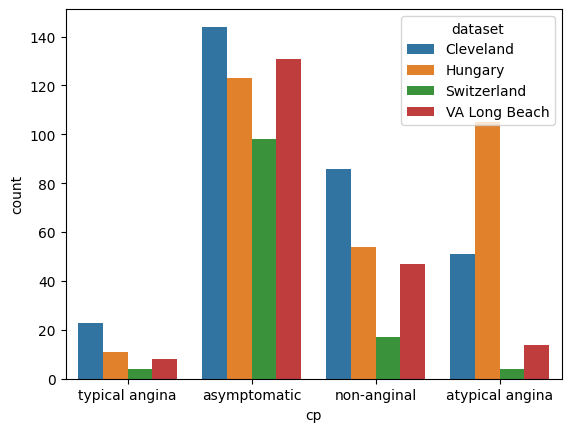

In [31]:
# countplot of cp column by sex column
sns.countplot(df, x='cp', hue='dataset')


### Let's explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.\
Write here what will happen if the blood pressure is high or low. You can then bin the data based on those values.

In [32]:
# Find the value counts of trestbps column
print(df['trestbps'].describe())

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


<Axes: xlabel='trestbps', ylabel='Count'>

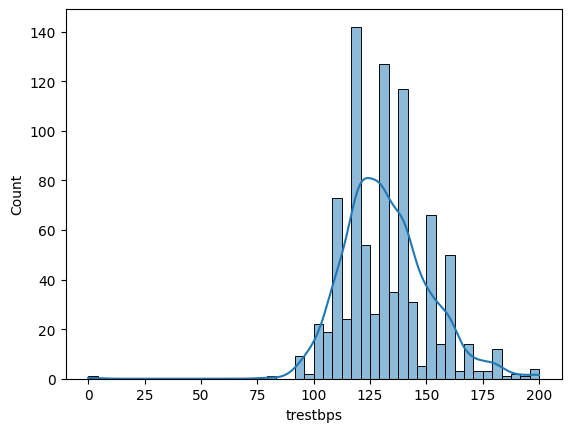

In [33]:
# Create a histplot of trestbps column
sns.histplot(df['trestbps'], kde= True)

In [34]:
# Impute missing values of trestbps column using iterative imputer
imputer_1 = IterativeImputer(max_iter=10, random_state=42)
imputer_1.fit(df[['trestbps']])
df['trestbps'] = imputer_1.transform(df[['trestbps']])
print("Missing values:", df['trestbps'].isnull().sum())

Missing values: 0


In [35]:
# Lets impute other columns with missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [36]:
# Impute missing values using iterative imputer for ca, oldpeak, thalch, chol columns
imputer_2 = IterativeImputer(max_iter=10, random_state=42)

#fit_transform the imputer on ca, oldpeak, thal, chol columns
df['ca'] = imputer_2.fit_transform(df[['ca']])
df['oldpeak'] = imputer_2.fit_transform(df[['oldpeak']])
df['thalch'] = imputer_2.fit_transform(df[['thalch']])
df['chol'] = imputer_2.fit_transform(df[['chol']])

In [37]:
# Lets impute other columns with missing values
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

### Let's impute missing values in thal column by using ML Models

In [38]:
df['thal'].isnull().sum()

486

In [39]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

---


# Dealing with missing values

In [40]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [41]:
# Find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print('Categorical Columns:', cat_cols)
print('Numerical Columns:', num_cols)

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [42]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalach', 'chol', 'trestbps', 'age']

In [43]:
# Define the function to impute the missing values in thal column
def impute_categorical_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col!= passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_cols = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_cols)
            X[col] = imputed_values[:, 0]
        else:
            pass    

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf_classifier = RandomForestClassifier()
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)

        print(f"The feature {passed_col} has been imputed with {round((acc_score * 100) ,2)} accuracy\n.")
        X = df_null.drop(passed_col, axis=1)

        for col in X.columns:
            if X[col].dtype == 'object' or X[col].dtype == 'category':
                X[col] = label_encoder.fit_transform(X[col])

        for col in other_missing_cols:
            if X[col].isnull().sum() > 0:
                col_with_missing_cols = X[col].values.reshape(-1, 1)
                imputed_values = iterative_imputer.fit_transform(col_with_missing_cols)
                X[col] = imputed_values[:, 0]
            else:
                pass
        
        if len(df_null) > 0:
            df_null[passed_col] = rf_classifier.predict(X)
            if passed_col in bool_cols:
                df_null[passed_col] = df_null[passed_col].map({0: False, 1:True})
            else:
                pass
        else:
            pass

        df_combined = pd.concat([df_not_null, df_null])

        
        return df_combined[passed_col]
def impute_continuous_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col!= passed_col]
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)


    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_cols = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_cols)
            X[col] = imputed_values[:, 0]
        else:
            pass    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    print("MAE= ", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE= ", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2= ", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_cols = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_cols)
            X[col] = imputed_values[:, 0]
        else:
            pass
        
    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    return df_combined(passed_col)        

In [44]:
for col in missing_data_cols:
    print("Missing Values ", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2)) +"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass


Missing Values  fbs : 9.78%
The feature fbs has been imputed with 80.12 accuracy
.
Missing Values  restecg : 0.22%
The feature restecg has been imputed with 66.85 accuracy
.
Missing Values  exang : 5.98%
The feature exang has been imputed with 79.19 accuracy
.
Missing Values  slope : 33.59%
The feature slope has been imputed with 67.48 accuracy
.
Missing Values  thal : 52.83%
The feature thal has been imputed with 74.71 accuracy
.


In [45]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [46]:
# Make box plots for all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y = 'age')
fig.show()

fig = px.box(data_frame=df, y = 'trestbps')
fig.show()

fig = px.box(data_frame=df, y = 'chol')
fig.show()

fig = px.box(data_frame=df, y = 'thalch')
fig.show()

fig = px.box(data_frame=df, y = 'oldpeak')
fig.show()


In [47]:
# Print the row from df where trestbps value is 0
df[df['trestbps'] == 0]

# remove this row from data
df = df[df['trestbps'] != 0]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


___

# Machine Learning

In [49]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [50]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The target column is **num** which is the predicted attribute. We will use this column to predict the heart disease. 
The unique values in the column are: [0, 1, 2, 3, 4], which states that there are five types of heart diseases. 
- **0 = no heart disease**
- **1 = mild heart disease**
- **2 = moderate heart disease**
- **3 = severe heart disease**
- **4 = critical heart disease**

In [51]:
# Split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# Encode X data using separate eoncoder for all categorical columns, and save it for inverse transform
# Separate encoder for all categrocial and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# Encode X data using separate eoncoder for all categorical columns, and save it for inverse transform
# Separate encoder for all categrocial and object columns and inverse transform at the end
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multiclass classification. 
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN
5. Naive Bayes
6. SVM
7. XGBoost
8. LightGBM
9. AdaBoost
10. Gradient Boost

In [53]:
# Import all models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

# Import pipeline
from sklearn.pipeline import Pipeline

# Import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pickle

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XGBClassifier', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {mean_accuracy}")
    print(f"Test Accuracy: {accuracy}")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_model = pipeline
        best_accuracy = accuracy

# Retrieve the best model
print("Best Model: ", best_model)

# Save the best model
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))


Model: Random Forest
Cross-Validation Accuracy: 0.6299319727891157
Test Accuracy: 0.6086956521739131

Model: Gradient Boosting
Cross-Validation Accuracy: 0.6149659863945578
Test Accuracy: 0.6521739130434783

Model: SVC
Cross-Validation Accuracy: 0.582312925170068
Test Accuracy: 0.5815217391304348

Model: Logistic Regression
Cross-Validation Accuracy: 0.5238095238095237
Test Accuracy: 0.483695652173913

Model: K-Neighbors
Cross-Validation Accuracy: 0.580952380952381
Test Accuracy: 0.592391304347826

Model: Decision Tree
Cross-Validation Accuracy: 0.5755102040816327
Test Accuracy: 0.6141304347826086

Model: Ada Boost
Cross-Validation Accuracy: 0.580952380952381
Test Accuracy: 0.5652173913043478

Model: XGBClassifier
Cross-Validation Accuracy: 0.6176870748299319
Test Accuracy: 0.625

Model: Naive Bayes
Cross-Validation Accuracy: 0.5755102040816326
Test Accuracy: 0.5271739130434783

Best Model:  Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))])


### Outputs:
1. The minimum age to have heart disease starts from 28 age.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of males and females get heart disease at 54-55 years of age.
4. Male percentage in the data is 78.91%. 
5. Female percentage is 21.09.
6. We have highest number of people from Cleveland(304) and lowest number of poeple from Switzerland(123).
    1. The highest females are from Cleveland(97) and lowest are from VA Long Beach(6).
    2. The highest males are from Hungary(212) and lowest are from Switzerland(113).
7. Write down the observations here about mean, median, mode of age column, grouped by dataset column. 
    1. The mean, median, mode of dataset is different from each other. 
8. Write down the observations about cp column.
    1. Highest cp is asymptomatic and lowest is typical angina. 
    2. out of 4 variables from dataset column, Cleveland has a bigger ratio of cp with 3 out of 4 cp is highest in Cleveland.
    3. Switzerland has the lowest number of chest pain types. 

9. Write down the steps about imputing missing values.
    1. import libraries
    2. load the dataset
    3. find the columns with missing values and store in an object
    4. find the columns based on data type
        1. Numeric
        2. Categorical
        3. Boolean
    5. Define the function to impute missing values
    6. Call the function
    7. Check missing values after imputation
10. Write down that how did you deal with outliers.
    1. I used my knowledge base to ideantify the outliers.
    2. I used the box plot to visualize the outliers.
    3. I found that Trestbps has 1 row with the value of zero so I removed it and by removing that row, outliers in other columns were also removed. 
